# Linear Regression Training Project: Ecommerce Clients

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). The data includes information about customers of an e-commerce website, including the following:
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many Month the customer has been a member.

In this project, we suppose that the company is trying to decide whether to focus their efforts on their mobile app experience or their website. We are here to help them make a data-driven decision.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Note:** As mentioned before, the data comes from a test dataset freely [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). Note that this is a training set and the information does not correspond to real people.

In [21]:
Ecommerce_dataset=pd.read_csv('/content/Ecommerce Customers')
Ecommerce_dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [22]:
Ecommerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [23]:
Ecommerce_dataset.select_dtypes('O').describe()

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [24]:
np.round(Ecommerce_dataset.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52


##`From our first look at the data, we can see that users spend more time on the website than on the mobile app!!`
## `So you can say that the more time users spend on the website, the more money they spend throughout the year? `





## 🤔🤔 `But Is That True ?!?`
##`We Have to Figure It Out!!`🧐🔨

##`Relationship between numeric columns`

# `First we ask the following question: How are the client's time spent on each platform related to the amount that they spend per year? There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year. On the other side, the second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.`


# `After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.`

In [25]:
fig=px.scatter_matrix(Ecommerce_dataset,dimensions=Ecommerce_dataset.select_dtypes('number').columns,
                      height=950,color='Yearly Amount Spent',opacity=0.65,title=('Relationship between numeric columns'),template='plotly_dark')
fig.show()

##`Time on Website`

In [26]:
# sns.jointplot(Ecommerce_dataset,x='Time on Website',y='Yearly Amount Spent')
fig=px.scatter(Ecommerce_dataset,x='Time on Website',y='Yearly Amount Spent',color='Yearly Amount Spent',marginal_x='histogram',template='plotly_dark',opacity=0.65,marginal_y='rug',title='Relationship btw Time  on website and yearly amount spent')
fig.show()

In [27]:
fig=px.density_heatmap(Ecommerce_dataset,x='Time on Website',y='Yearly Amount Spent',marginal_x='box',marginal_y='violin',
                       title='Relationship btw Time  on website and yearly amount spent',template='plotly_dark')
fig.show()

##`Length of Membership`

In [28]:
fig=px.density_heatmap(Ecommerce_dataset,x='Length of Membership',y='Yearly Amount Spent',marginal_x='box',marginal_y='violin',
                       title='Relationship btw Length of Membership and yearly amount spent',template='plotly_dark')
fig.show()

In [29]:
fig=px.scatter(Ecommerce_dataset,x='Length of Membership',y='Yearly Amount Spent',color='Yearly Amount Spent',marginal_x='histogram',template='plotly_dark',opacity=0.65,marginal_y='rug',title='Relationship btw Length of Membership  and yearly amount spent')
fig.show()

##`Time on App`

In [30]:
fig=px.scatter(Ecommerce_dataset,x='Time on App',y='Yearly Amount Spent',color='Yearly Amount Spent',marginal_x='histogram',
               template='plotly_dark',opacity=0.65,marginal_y='rug',title='Relationship btw Time on App  and yearly amount spent')
fig.show()

In [31]:
fig=px.density_heatmap(Ecommerce_dataset,x='Time on App',y='Yearly Amount Spent',marginal_x='box',marginal_y='violin',
                       title='Relationship btw Time on App and yearly amount spent',template='plotly_dark')
fig.show()

##`Avg_Session_Length`

In [32]:
fig=px.scatter(Ecommerce_dataset,x='Avg. Session Length',y='Yearly Amount Spent',color='Yearly Amount Spent',marginal_x='histogram',
               template='plotly_dark',opacity=0.65,marginal_y='rug',title='Relationship btw Avg_Session_Length  and yearly amount spent')
fig.show()

##` From Thses Graphs & Explorations We Can Find Out That:`

• `There is a Strong Linear Positive Correlation between Yearly_Spent and Membership_Length`

• `There is a Moderate Linear Positive Correlation between Yearly_Spent and App Usage Time`

• `There is a Weak Linear Positive Correlation between Yearly_Spent and Avg_Session_Length`

• `Almost, There is No Correlation between Yearly_Spent and Website Usage Time.`

##`Correlation HeatMap & Charts 👩‍💻📈:`

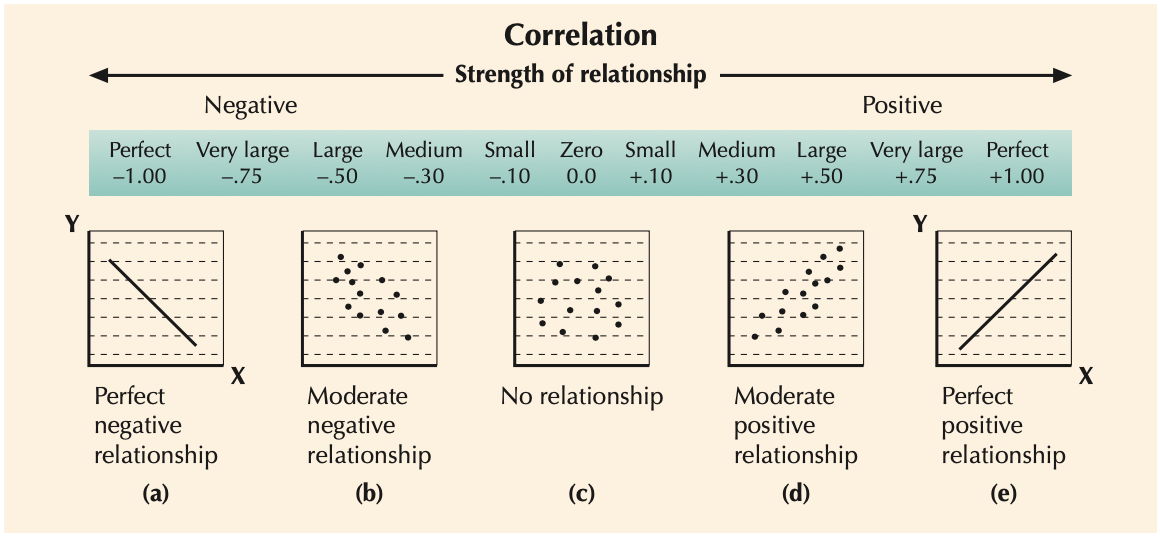

In [33]:
from plotly.offline import iplot
corr=Ecommerce_dataset.corr(numeric_only=True)
fig=px.imshow(corr,template='plotly_dark',text_auto='0.2f',title=('correlation btw data'),aspect=1,
    color_continuous_scale="orrd")
fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"consolas"
    }

)
fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

In [34]:
# sns.lmplot(data=Ecommerce_dataset,x='Length of Membership',y='Yearly Amount Spent',scatter_kws={'alpha':0.6})
fig=px.scatter(Ecommerce_dataset,x='Length of Membership',y='Yearly Amount Spent', opacity=0.6,trendline='ols')
fig.show()

##`Model building`

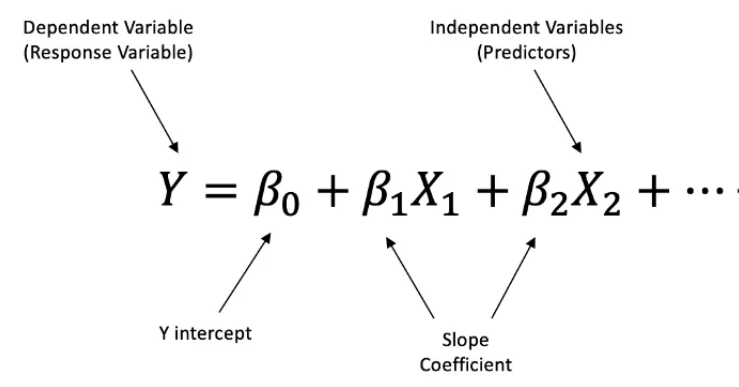

##`Now, It's Time To Select Our Features🧐🤔`

In [35]:
X=Ecommerce_dataset.iloc[:,3:-1]
y=Ecommerce_dataset.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=38)

##`Standardizing or Normalizing Independent variable in train and test data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.19240047, -0.03148207,  0.01687323, -0.08651658],
       [ 0.72290824,  0.0498988 ,  0.23777082,  0.41482724],
       [ 1.51306842, -0.622043  , -0.63170991,  0.48322153],
       ...,
       [ 0.73018664, -2.07256153, -1.06484012,  0.30347971],
       [-0.80015938,  0.95889146,  0.07963411,  0.14329968],
       [-0.86092814,  0.20574079, -0.07115239, -0.61078197]])

In [38]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.46005616, -0.07008752, -0.5264959 ,  0.38319569],
       [-0.81939074, -1.56635702,  0.30344598,  0.94074619],
       [-0.17887437,  1.03821525,  0.82173812,  1.11452446],
       [-0.69065088,  0.42646752,  0.58410725,  0.76647314],
       [ 1.32135543, -0.78427365,  1.61203726, -1.40006572],
       [-0.29823654, -1.08479555,  0.60298273,  0.46215386],
       [-1.5819152 ,  0.59235692,  2.50570706,  0.20311058],
       [-1.36641354,  1.18084515, -0.80553537,  0.01548572],
       [-0.66935713,  0.07556962,  1.24915663,  0.32076554],
       [ 0.05463054, -0.05127897,  0.24418766,  1.16178407],
       [ 0.20987709,  1.88073966,  0.73343434,  2.35590447],
       [ 0.50298393,  0.7844527 , -0.580708  ,  1.07047002],
       [ 1.43575438, -1.43652069, -0.20247186, -0.16965172],
       [-0.56991   ,  1.42422678, -1.00929967, -0.34559288],
       [-1.22173041,  1.45754575, -0.14480851, -1.14238717],
       [ 0.78128218, -0.84551297, -0.70900151,  0.7355073 ],
       [-1.27886314, -0.

In [39]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [40]:
kf=KFold(n_splits=25,shuffle=True,random_state=99)
score=cross_val_score(regression,X,y,cv=kf)

In [41]:
print(f'Cross_validation_score of  Model:{np.mean(score)*100}')

Cross_validation_score of  Model:98.25379228801674


In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
kf=KFold(n_splits=25,shuffle=True,random_state=99)
score=cross_val_score(regression,X_train,y_train,cv=kf)

In [44]:
print(f'Cross_validation_score of train dataset:{np.mean(score)*100}')

Cross_validation_score of train dataset:97.91388204475736


#`Let's Predict Some Data`

In [45]:
pred_reg=regression.predict(X_test)

In [46]:
pred_reg

array([530.97398236, 477.9569687 , 604.66070349, 546.38931882,
       413.25291447, 479.10340921, 496.06446398, 509.98760998,
       505.65062164, 571.48105106, 725.15114489, 608.23131493,
       468.10528708, 516.01067628, 451.11640299, 531.54974837,
       547.64470387, 525.31030993, 489.58733108, 371.54486064,
       558.98900358, 554.06827976, 418.79013473, 548.82509856,
       433.41315809, 552.8523991 , 449.60135329, 431.23702296,
       542.31728641, 549.23326709, 692.44495668, 563.95689112,
       574.46833822, 456.41469564, 537.93132102, 528.13745932,
       478.05646672, 606.82675305, 470.53299962, 566.45524098,
       403.00396931, 481.40011162, 425.9961424 , 519.77039635,
       474.04911779, 561.75073871, 426.8908992 , 536.49154215,
       529.40792192, 475.15417795, 513.12794475, 508.99408177,
       598.15783535, 314.32026032, 389.70563835, 434.06693848,
       395.74015548, 566.37949218, 598.15719586, 420.97828579,
       514.0856346 , 500.72016895, 445.75394165, 466.69

In [80]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:98.33923340661507


In [48]:
error=mean_absolute_error(y_test,pred_reg)
print(f"Error score:{error}")

Error score:7.668857063880347


In [81]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 7.668857063880347
Mean Squared Error: 94.45374696732395
Root Mean Squared Error: 9.718731757144239


In [49]:
d={'Actual_yearly_spend':y_test,'predicted_yearly_spend':pred_reg}

In [50]:
predection_df=pd.DataFrame(d)
predection_df

,Actual_yearly_spend,predicted_yearly_spend
446,529.194519,530.973982
147,479.731938,477.956969
314,610.128033,604.660703
414,532.724805,546.389319
476,408.958336,413.252914
...,...,...
363,527.782996,523.325798
122,514.239521,498.084809
324,559.199048,573.165757
356,640.584062,646.155244


In [83]:
residuals=y_test-pred_reg

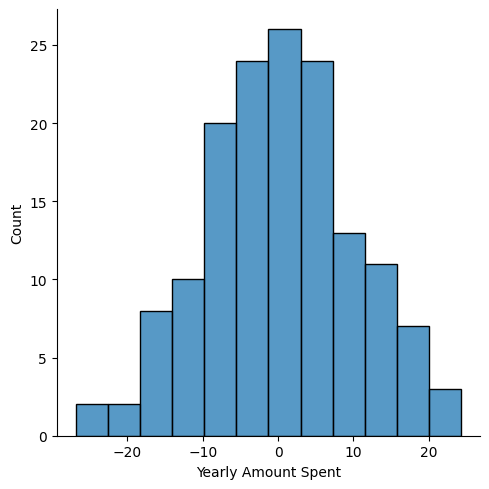

In [85]:
sns.displot(residuals)

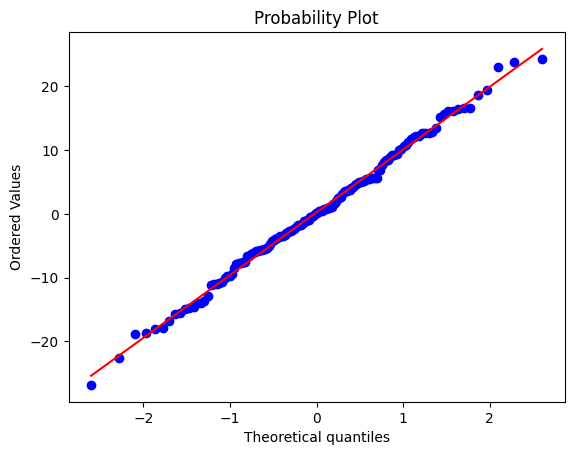

In [86]:
import pylab
import scipy.stats  as stats
stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

In [51]:
fig=px.scatter(predection_df,x='predicted_yearly_spend',y='Actual_yearly_spend',
               color='predicted_yearly_spend',opacity=0.6,trendline='ols',template='plotly_dark',title=('Predicted Vs. Actual'))

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

#`Conclusions` 🧐
• `Cross Validation Score`: 98.25%

• `Train Score`: 97.91%

• `Test Score`: 98.33%

###`coef_---Provides insight into the linear relationships between features and the target variable.`

In [52]:
# Coefficient interpretation
coef=regression.coef_
coef

array([24.79255163, 38.19833605,  0.6042002 , 63.41541082])

In [53]:
pd.DataFrame(coef,X.columns,columns=['coef'])

,coef
Avg. Session Length,24.792552
Time on App,38.198336
Time on Website,0.604200
Length of Membership,63.415411


In [54]:
# Feature importance (permutation feature importance)
from sklearn.inspection import permutation_importance
x=permutation_importance(regression,X_test,y_test)
x.importances_mean

array([ 2.60870454e-01,  5.30295755e-01, -9.32757106e-05,  1.10196811e+00])

In [55]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [56]:
sorted_importance=sorted(zip(X.columns,x.importances_mean),key=lambda x:x[1],reverse=True)
for feature ,importance in sorted_importance:
  print(f"{feature}:: {importance}")

Length of Membership:: 1.1019681066127798
Time on App:: 0.5302957553144269
Avg. Session Length:: 0.26087045379830587
Time on Website:: -9.327571062605067e-05


In [64]:
import plotly.express as px
fig=px.bar(x=[feature for feature,importance in sorted_importance ],y=[importance for feature ,importance in sorted_importance],title='feature importance of our model')
fig.show()

##`weighted score of feature importance:`
`Length of Membership contributes about (55%) of the total importance`

`Time on App contributes about (28%)`

`Avg. Session Length contributes about (12%)`

`Time on Website contributes almost nothing (less than 1%)`

#` 🤩 **The most influential features on the User Yearly Spent are the time spent on the mobile app and the length of membership.**`

# 😉 `**Contrary to our expectations, the time on website has minimal effects, with results opposite to what we initially believed.**`